In [41]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('https://gist.githubusercontent.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751/raw/72de943e040b8bd0d087624b154d41b2ba9d9b60/retail_dataset.csv', sep=',')

In [43]:
df.head(5)

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [44]:
items = (df['0'].unique())
items


array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

In [48]:
encoded_vals = []
def custom():
  for index, row in df.iterrows():
      labels = {}
      uncommons = list(set(items) - set(row))
      commons = list(set(items).intersection(row))
      for uc in uncommons:
          labels[uc] = 0
      for com in commons:
          labels[com] = 1
      encoded_vals.append(labels)
  encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)
 

In [49]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [57]:
ohe_df = pd.DataFrame(encoded_vals)
print(ohe_df)

      Milk  Bagel  Diaper  Bread  Wine  Meat  Pencil  Eggs  Cheese
0        0      0       1      1     1     1       1     1       1
1        1      0       1      1     1     1       1     0       1
2        1      0       0      0     1     1       0     1       1
3        1      0       0      0     1     1       0     1       1
4        0      0       0      0     1     1       1     0       0
...    ...    ...     ...    ...   ...   ...     ...   ...     ...
1570     0      0       0      1     0     0       0     1       1
1571     1      0       0      0     0     1       1     0       0
1572     0      0       1      1     1     1       1     1       1
1573     0      0       0      0     0     1       0     0       1
1574     0      1       0      1     1     1       0     1       0

[1575 rows x 9 columns]


In [58]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True)
freq_items.head(7)

,support,itemsets
0,0.501587,(Milk)
1,0.425397,(Bagel)
2,0.406349,(Diaper)
3,0.504762,(Bread)
4,0.438095,(Wine)
5,0.476190,(Meat)
6,0.361905,(Pencil)


In [59]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
1,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
3,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
4,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624


In [24]:
apriori?

In [25]:
association_rules?

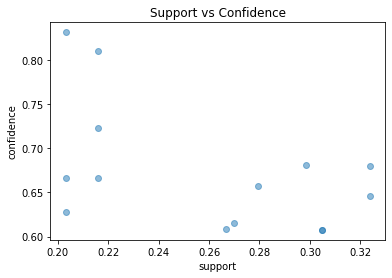

In [60]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

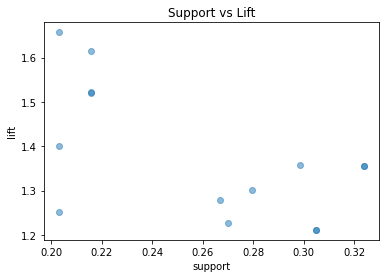

In [62]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

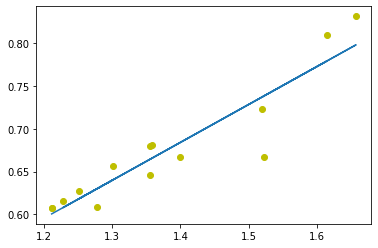

In [64]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))